In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
df_item = pd.read_csv('input/item-features.csv')
df_user = pd.read_csv('input/user-features.csv')
subm = pd.read_csv('input/sample-submission.csv')

In [3]:
df_item = df_item.drop(columns=['19','27','30','9'])
df_item = df_item.sort_values('item_id').reset_index(drop=True)

df_user = df_user.iloc[:, :2]
df_user = df_user.sort_values('user_id').reset_index(drop=True)

In [273]:
def preproc(df, cols_to_drop=None):
    X = df.merge(df_user, on='user_id')

    X['timestamp'] = pd.to_datetime(X['timestamp'], unit='s')
    X['month'] = X['timestamp'].dt.month
    X['day'] = X['timestamp'].dt.day
    X['hour'] = X['timestamp'].dt.hour
    X['minute'] = X['timestamp'].dt.minute
    X['dayofyear'] = X['timestamp'].dt.dayofyear
    X['week'] = X['timestamp'].dt.week
    X['dayofweek'] = X['timestamp'].dt.dayofweek
    X['quarter'] = X['timestamp'].dt.quarter

    if 'item_id' in df.columns:
        X = X.merge(df_item, on='item_id')
    
    X = X.drop(columns=cols_to_drop)
    return X

y = train['like']

X_train = preproc(train, cols_to_drop=['user_id', 'item_id', 'like', 'timestamp'])
X_test = preproc(test, cols_to_drop=['user_id', 'timestamp'])

X_train.head()

,0_x,month,day,hour,minute,dayofyear,week,dayofweek,quarter,0_y,...,20,21,22,23,24,25,26,28,29,31
0,0.001300,3,31,5,3,90,13,4,1,0.000348,...,-0.000371,-0.001591,-0.002098,-0.000349,0.000561,-0.00054,-0.000996,0.000211,-0.000584,0.000149
1,0.000919,4,1,11,44,91,13,5,2,0.000348,...,-0.000371,-0.001591,-0.002098,-0.000349,0.000561,-0.00054,-0.000996,0.000211,-0.000584,0.000149
2,0.000491,4,1,10,1,91,13,5,2,0.000348,...,-0.000371,-0.001591,-0.002098,-0.000349,0.000561,-0.00054,-0.000996,0.000211,-0.000584,0.000149
3,0.000602,4,1,4,47,91,13,5,2,0.000348,...,-0.000371,-0.001591,-0.002098,-0.000349,0.000561,-0.00054,-0.000996,0.000211,-0.000584,0.000149
4,0.001043,4,2,20,42,92,13,6,2,0.000348,...,-0.000371,-0.001591,-0.002098,-0.000349,0.000561,-0.00054,-0.000996,0.000211,-0.000584,0.000149


In [274]:
df_item

,item_id,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,28,29,31
0,0,0.001433,-0.003243,-0.003030,0.004299,-0.001026,0.001412,0.001671,0.001373,-0.006249,...,-0.001531,-0.006559,-0.008651,-0.001440,0.002312,-0.002225,-0.004108,0.000871,-0.002408,0.000613
1,1,0.002482,-0.005617,-0.005248,0.007446,-0.001777,0.002446,0.002895,0.002378,-0.010824,...,-0.002652,-0.011360,-0.014983,-0.002493,0.004004,-0.003855,-0.007115,0.001508,-0.004171,0.001062
2,2,0.001871,-0.004236,-0.003958,0.005615,-0.001340,0.001845,0.002183,0.001793,-0.008162,...,-0.002000,-0.008566,-0.011299,-0.001880,0.003020,-0.002907,-0.005365,0.001137,-0.003145,0.000801
3,3,0.001390,-0.003146,-0.002940,0.004171,-0.000996,0.001370,0.001622,0.001332,-0.006063,...,-0.001485,-0.006363,-0.008392,-0.001397,0.002243,-0.002159,-0.003985,0.000845,-0.002336,0.000595
4,4,0.001738,-0.003933,-0.003675,0.005213,-0.001244,0.001713,0.002027,0.001665,-0.007579,...,-0.001857,-0.007953,-0.010490,-0.001746,0.002804,-0.002699,-0.004982,0.001056,-0.002920,0.000743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,439,0.000348,-0.000787,-0.000735,0.001043,-0.000249,0.000343,0.000405,0.000333,-0.001516,...,-0.000371,-0.001591,-0.002098,-0.000349,0.000561,-0.000540,-0.000996,0.000211,-0.000584,0.000149
440,440,0.000777,-0.001759,-0.001643,0.002332,-0.000557,0.000766,0.000906,0.000745,-0.003389,...,-0.000830,-0.003557,-0.004691,-0.000781,0.001254,-0.001207,-0.002228,0.000472,-0.001306,0.000332
441,441,-0.121692,0.181685,0.204412,-0.150535,0.235095,-0.389399,-0.326175,0.287157,-0.107230,...,-0.061151,0.052523,-0.035643,-0.015009,-0.286772,0.002378,-0.065991,-0.112601,0.159891,-0.370836
442,442,0.000491,-0.001112,-0.001039,0.001475,-0.000352,0.000484,0.000573,0.000471,-0.002144,...,-0.000525,-0.002250,-0.002967,-0.000494,0.000793,-0.000763,-0.001409,0.000299,-0.000826,0.000210


# LGB

In [4]:
from sklearn.model_selection import KFold, StratifiedKFold, TimeSeriesSplit
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

import time

In [344]:
def predict_k(model, X_test, item_params, k=20):
    items_data = item_params.iloc[:, 1:].values
    n_items = len(item_params)
    y_pred = list()
    
    for user_idx in range(X_test.shape[0]):
#         result = pd.DataFrame(columns=['item_id', 'proba'])
#         result['item_id'] = range(n_items)
        
        user_data = np.tile(X_test[[user_idx]], (n_items, 1))
        data = np.concatenate([user_data, items_data], axis=1)
        
        pred = model.predict(data)
        y_pred.append(pred)
        
#         result['proba'] = model.predict(data)
#         result = result.sort_values('proba', ascending=False)
#         y_pred.append(result['item_id'].values)
        
    return np.array(y_pred)


def train_model(X, X_test, y, params, folds, model_type='lgb', averaging='usual', 
                verbose_eval=False, plot_feature_importance=False):
    oof = np.zeros(len(X))
    prediction = np.zeros((len(X_test), len(df_item)))
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
        if verbose_eval:
            print('Fold', fold_n, 'started at', time.ctime())
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        if model_type == 'lgb':
            train_data = lgb.Dataset(X_train, label=y_train, params={'verbose': -1})
            valid_data = lgb.Dataset(X_valid, label=y_valid, params={'verbose': -1})
            
            model = lgb.train(params,
                    train_data,
                    num_boost_round=20000,
                    valid_sets = [train_data, valid_data],
                    verbose_eval=verbose_eval,
                    early_stopping_rounds = 200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = predict_k(model, X_test, df_item)
            
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(roc_auc_score(y_valid, y_pred_valid))

        if averaging == 'usual':
            prediction += y_pred
        elif averaging == 'rank':
            prediction += pd.Series(y_pred).rank().values  
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = [f'col{ncol}' for ncol in range(X.shape[-1])]
            fold_importance["importance"] = model.feature_importance()
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                   by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction, scores
    
    else:
        return oof, prediction, scores

In [361]:
n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
# folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
# folds = TimeSeriesSplit(n_splits=n_fold)

In [377]:
params = {'boost': 'gbdt', 
          'feature_fraction': 0.5, 
          'lambda_l2': 0.57, 
          'learning_rate': 0.01, 
          'max_depth': 13, 
          'metric': 'auc', 
          'min_data_in_leaf': 63, 
          'num_leaves': 226, 
          'num_threads': -1, 
          'objective': 'binary', 
          'verbosity': -1}

In [407]:
X = X_train.values
y_like = y.values.flatten()
X_test_np = X_test.values
X.shape, X_test_np.shape

# X = X_train.values[:, 1:]
# y_like = y.values.flatten()
# X_test_np = X_test.values[:, 1:]
# X.shape, X_test_np.shape

((8674, 37), (497, 9))

CV mean score: 0.5594, std: 0.0207.


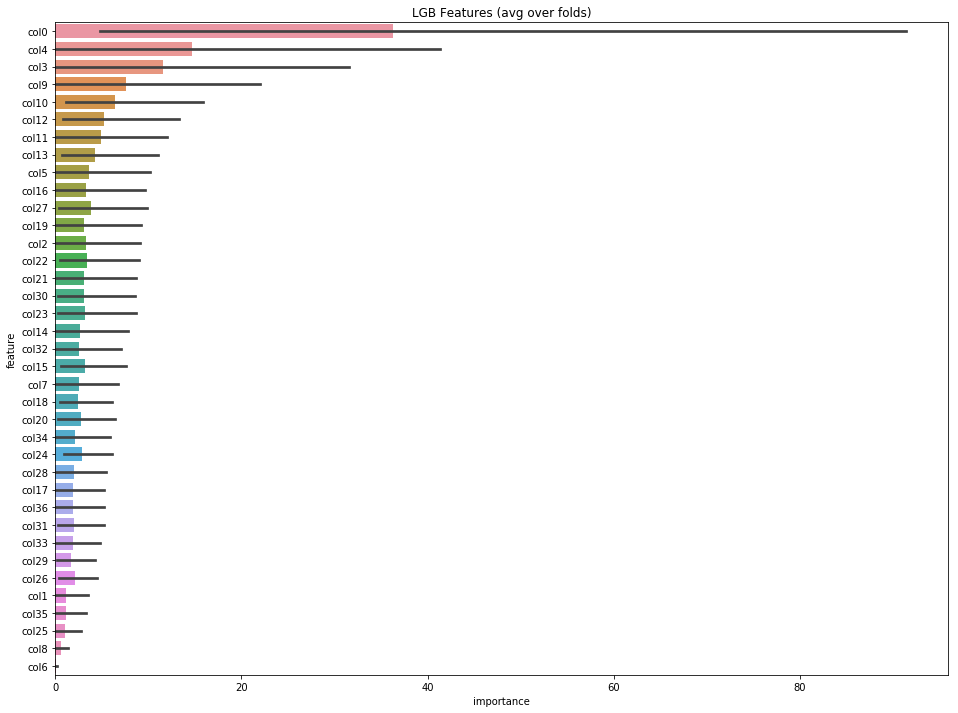

In [408]:
oof_lgb, prediction_lgb, scores = train_model(X, X_test_np, y_like, params=params, plot_feature_importance=True,
                                              folds=folds, model_type='lgb', verbose_eval=False)

In [393]:
pred = np.zeros((prediction_lgb.shape[0], 20), dtype=int)

for i in range(prediction_lgb.shape[0]):
    pred[i] = np.argsort(prediction_lgb[i])[::-1][:20]

# Hyperopt

In [335]:
from hyperopt import hp

In [338]:
def to_max(hp_params):
    oof_lgb, prediction_lgb, scores = train_model(X, X_test_np, y_like, params=hp_params, 
                                                  folds=folds, model_type='lgb')
    return -np.mean(scores)

lgb_params = {'boost': 'gbdt',
          'feature_fraction': hp.uniform('feature_fraction', 0.05, 1),
          'learning_rate': 0.01,
          'max_depth': hp.choice('max_depth', [5, 9, 13, 17, 23, -1]),  
          'metric': 'auc',
          'min_data_in_leaf': hp.uniformint('min_data_in_leaf', 11, 151),
          'num_leaves': hp.uniformint('num_leaves', 31, 351),
          'num_threads': -1,
          'verbosity': -1,
          'lambda_l2': hp.uniform('lambda_l2', 0, 3),
          'objective': 'binary',
         }

In [339]:
# minimize the objective over the space
from hyperopt import fmin, tpe, space_eval
best = fmin(to_max, lgb_params, algo=tpe.suggest, max_evals=100)

print(best)
print(space_eval(lgb_params, best))

CV mean score: 0.5484, std: 0.0200.                                                                                    
CV mean score: 0.5467, std: 0.0220.                                                                                    
CV mean score: 0.5564, std: 0.0230.                                                                                    
CV mean score: 0.5495, std: 0.0140.                                                                                    
CV mean score: 0.5495, std: 0.0151.                                                                                    
CV mean score: 0.5576, std: 0.0178.                                                                                    
CV mean score: 0.5511, std: 0.0202.                                                                                    
CV mean score: 0.5544, std: 0.0140.                                                                                    
CV mean score: 0.5574, std: 0.0181.     

# First try

In [5]:
from scipy.sparse import csr_matrix

from lightfm import LightFM
from lightfm.evaluation import precision_at_k

C:\Users\SakaevRF\AppData\Local\Continuum\anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()  # StandardScaler()
df_item_np = csr_matrix(scaler.fit_transform(df_item.iloc[:, 1:]))

# df_user_np = csr_matrix(df_user.iloc[:, [1]].values)
df_user_np = csr_matrix(scaler.fit_transform(df_user.iloc[:, [1]].values))

y_np = train['like'].map({0:-1, 1:1}).values

data_csr = csr_matrix((y_np, (train['user_id'] , train['item_id'])))

In [11]:
from sklearn.metrics.pairwise import linear_kernel, pairwise_distances

# Compute the cosine similarity matrix
# item_sim = linear_kernel(df_item_np, df_item_np)
# item_sim = csr_matrix(item_sim)

item_sim = csr_matrix(pairwise_distances(df_item_np, metric='cosine'))

In [61]:
from lightfm.data import Dataset

dataset = Dataset()
dataset.fit(
    set(df_user['user_id']), 
    set(df_item['item_id']),
    item_features=df_item.iloc[:, 1:].columns, 
    user_features=df_user.iloc[:, 1:].columns)

In [67]:
questions_features = dataset.build_item_features(tuple(df_item.to_numpy().tolist()))

professional_features = dataset.build_user_features(df_user.iloc[:, 1:])

ValueError: Expected tuples of (item_id, features), got [0.0, 0.001432817643837124, -0.0032429745071159213, -0.003030208198328597, 0.004299094684009264, -0.0010261484789521821, 0.0014123511169413096, 0.0016714453308895765, 0.0013730419154717995, -0.006249421602263979, 0.007047553185436034, 0.0005978148868985777, 0.0047207769916732, 0.002690021863351261, 0.0015912722720028587, -0.004328689124150666, -0.00036876180520547315, -0.003456183965009672, -0.001831483544118085, -0.001531115576414797, -0.006558563922017255, -0.00865061751488665, -0.0014395804528968827, 0.002311881082902319, -0.002225418107328018, -0.004108039583024678, 0.0008709057757490485, -0.002408157464239789, 0.0006129917954744497].

In [66]:
tuple(df_item.to_numpy().tolist())

([0.0,
  0.001432817643837124,
  -0.0032429745071159213,
  -0.003030208198328597,
  0.004299094684009264,
  -0.0010261484789521821,
  0.0014123511169413096,
  0.0016714453308895765,
  0.0013730419154717995,
  -0.006249421602263979,
  0.007047553185436034,
  0.0005978148868985777,
  0.0047207769916732,
  0.002690021863351261,
  0.0015912722720028587,
  -0.004328689124150666,
  -0.00036876180520547315,
  -0.003456183965009672,
  -0.001831483544118085,
  -0.001531115576414797,
  -0.006558563922017255,
  -0.00865061751488665,
  -0.0014395804528968827,
  0.002311881082902319,
  -0.002225418107328018,
  -0.004108039583024678,
  0.0008709057757490485,
  -0.002408157464239789,
  0.0006129917954744497],
 [1.0,
  0.002481712957107005,
  -0.005616996613975544,
  -0.005248474557017102,
  0.007446250419253531,
  -0.0017773413016547747,
  0.0024462638926694307,
  0.002895028235174681,
  0.002378178358518765,
  -0.010824315733039686,
  0.012206720186219015,
  0.0010354457576292992,
  0.00817662560078

In [27]:
# 0.08209256

model = LightFM(no_components=60, loss='warp', random_state=11)
model.fit(data_csr,
          user_features=df_user_np,
          item_features=df_item_np,
          epochs=50)

train_precision = precision_at_k(model, data_csr, user_features=df_user_np, item_features=df_item_np, k=20).mean()

print(train_precision)

0.081589535


In [53]:
# 0.02

item_data = csr_matrix(df_item.iloc[:, 1:15])

model = LightFM(no_components=60, loss='warp', random_state=11)
model.fit(data_csr,
          item_features=item_data,
          epochs=20)

train_precision = precision_at_k(model, data_csr, item_features=item_data, k=20).mean()

print(train_precision)

0.08209256


In [19]:
model = LightFM(no_components=60, loss='warp', random_state=11)
model.fit(data_csr,
          user_features=df_user_np,
          epochs=20)

train_precision = precision_at_k(model, data_csr, user_features=df_user_np, k=20).mean()

print(train_precision)

0.107444674


In [68]:
model = LightFM(no_components=60, loss='warp', random_state=11, max_sampled=250)
model.fit(data_csr,
          epochs=20)

train_precision = precision_at_k(model, data_csr, k=20).mean()

print(train_precision)

0.22072434


# HYPEROPT FM

In [ ]:
# item_alpha, user_alpha, max_sampled

In [430]:
def to_max_fm_all(hp_params):
    model = LightFM(**hp_params)
    model.fit(data_csr,
              user_features=df_user_np,
              item_features=df_item_np,
              epochs=50)
    
    train_precision = precision_at_k(model, data_csr, user_features=df_user_np, 
                                     item_features=df_item_np, k=20).mean()

    return -train_precision

In [451]:
def to_max_fm(hp_params):
    model = LightFM(**hp_params)
    model.fit(data_csr, epochs=20)
    train_precision = precision_at_k(model, data_csr, k=20).mean()
    return -train_precision

def to_max_fm_all(hp_params):
    try:
        model = LightFM(**hp_params)
        model.fit(data_csr,
                  user_features=df_user_np,
                  item_features=df_item_np,
                  epochs=50)

        train_precision = precision_at_k(model, data_csr, user_features=df_user_np, 
                                         item_features=df_item_np, k=20).mean()
    except:
        return 0

    return -train_precision

hp_params = {'no_components': hp.uniformint('no_components', 10, 150),
              'loss': 'warp',
              'random_state': 11,
              'item_alpha': hp.uniform('item_alpha', 0, 0.5),  
              'user_alpha': hp.uniform('user_alpha', 0, 0.5),  
              'max_sampled': hp.uniformint('max_sampled', 10, 500),
             'learning_rate': 0.01
             }

In [452]:
# minimize the objective over the space
from hyperopt import fmin, tpe, space_eval
best = fmin(to_max_fm_all, hp_params, algo=tpe.suggest, max_evals=100)

print(best)
print(space_eval(hp_params, best))

 11%|█████▍                                           | 11/100 [01:40<11:59,  8.08s/it, best loss: -0.0825955793261528]

C:\Users\SakaevRF\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



 27%|█████████████▏                                   | 27/100 [03:39<11:12,  9.21s/it, best loss: -0.0825955793261528]

C:\Users\SakaevRF\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



 37%|██████████████████▏                              | 37/100 [05:18<09:17,  8.85s/it, best loss: -0.0825955793261528]

C:\Users\SakaevRF\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



 43%|█████████████████████                            | 43/100 [06:38<13:29, 14.21s/it, best loss: -0.0825955793261528]

C:\Users\SakaevRF\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



100%|███████████████████████████████████████████████| 100/100 [16:49<00:00, 15.67s/it, best loss: -0.08360160887241364]
{'item_alpha': 0.08047197091783757, 'max_sampled': 249.0, 'no_components': 95.0, 'user_alpha': 0.09924232044168897}
{'item_alpha': 0.08047197091783757, 'learning_rate': 0.01, 'loss': 'warp', 'max_sampled': 249, 'no_components': 95, 'random_state': 11, 'user_alpha': 0.09924232044168897}


In [271]:
for i in range(100):
    mask = np.random.randint(2, size=(28), dtype='bool')
    scaler = StandardScaler()
    
    # to_scale = scaler.fit_transform(df_item.iloc[:, 1:])[:, mask]
    to_scale = df_item.iloc[:, 1:].values[:, mask]
    
    df_item_np = csr_matrix(to_scale)
    item_sim = linear_kernel(df_item_np, dense_output=False)

    model = LightFM(no_components=30, loss='warp', random_state=11)
    model.fit(data_csr,
              item_features=df_item_np,
              epochs=20)

    train_precision = precision_at_k(model, data_csr, item_features=df_item_np, k=20).mean()

    print(mask, train_precision)

[ True  True  True  True False False False False False  True False  True
  True  True False False False  True  True False False  True False  True
 False  True  True  True] 0.08269618
[False  True False False False False  True False  True  True  True  True
  True False False  True False  True  True False False  True  True  True
 False False False False] 0.07354125
[False  True False False  True False False False False  True False  True
 False  True  True  True False  True  True False  True  True False  True
 False  True  True False] 0.08028169
[False  True False  True False False  True False False  True False  True
  True  True False  True  True  True False  True  True False False  True
 False False False False] 0.07233401
[False  True False  True  True False  True  True False  True  True False
 False  True  True  True False False  True False  True  True False False
 False False False False] 0.07877264
[ True  True False False False False  True False  True  True  True False
  True  True

[ True  True False False  True False False  True False False False  True
 False  True  True  True  True  True False False  True  True False  True
 False  True False  True] 0.080181085
[False False False  True  True  True  True  True False False  True  True
  True  True  True False False  True  True  True False False False  True
  True  True False  True] 0.07595573
[ True  True False False False False  True  True False False  True  True
 False  True False  True  True False False  True False False False False
  True False False  True] 0.07273642
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True False False False
 False  True  True False] 0.08289739
[ True  True  True False False  True  True False  True  True False False
  True False  True False False False  True False False False  True False
 False  True  True  True] 0.07957747
[False False  True False  True False False False  True False  True  True
  True Fals

[False False False  True  True  True False  True  True False False False
  True False False  True False  True False  True  True  True False False
 False  True  True False] 0.07997988
[ True False  True  True  True  True  True  True False False  True  True
  True  True  True False  True  True  True False  True False False  True
  True False  True False] 0.08018109
[False  True False  True  True False False False  True  True False False
  True  True False False  True  True False False False False  True  True
  True False  True False] 0.076861165
[False False  True False  True  True False False False  True  True False
  True  True False  True False False  True  True False False False  True
 False False  True  True] 0.0750503
[ True  True  True  True  True  True False  True  True  True False  True
  True  True False  True False  True  True  True False False False  True
  True  True False  True] 0.082696185
[False  True False  True  True  True False False  True False  True False
 False  Tru

In [208]:
def sample_recommendation(model, data, user_ids, k=20):
    n_users, n_items = data_csr.shape
    items = np.arange(n_items)
    answers = list()

    for user_id in user_ids:
        scores = model.predict(user_id, items)
        top_items = items[np.argsort(-scores)]
        answers.append(top_items[:k])
    return np.array(answers)

pred = sample_recommendation(model, data, test.iloc[:, 0].to_list())

In [395]:
subm.iloc[:, 1:] = pred

In [396]:
subm.head()

,user_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,166,37,35,76,66,200,80,72,7,58,...,60,22,65,232,405,402,229,240,239,390
1,26,216,311,276,402,399,232,391,274,173,...,413,390,230,168,405,411,239,432,388,229
2,41,216,232,413,230,276,352,408,311,239,...,168,173,240,399,274,411,272,374,156,405
3,286,173,216,178,262,413,274,168,311,296,...,230,276,352,408,391,440,73,184,24,50
4,108,216,262,413,168,311,173,276,274,230,...,296,408,214,352,229,440,302,396,382,204


In [397]:
subm.to_csv('input/subm002.csv', index=None)